In [1]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):
    markers = ("o", "s", "^", "v", "<")
    colors = ("red", "blue", "lightgreen", "gray", "cyan")

    cmap = ListedColormap(colors[: len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution),
    )

    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)

    plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(
            x=X[y == cl, 0],
            y=X[y == cl, 1],
            alpha=0.8,
            c=colors[cl],
            marker=markers[cl],
            label=f"Class {cl}",
            edgecolor="black",
        )

    if test_idx:
        X_test, _ = X[test_idx, :], y[test_idx]

        plt.scatter(
            X_test[:, 0],
            X_test[:, 1],
            c="none",
            edgecolor="black",
            alpha=1.0,
            linewidth=1,
            marker="o",
            s=100,
            label="Test set",
        )


Impurity Function (criterion)


/tmp/nix-shell.xmNf8V/ipykernel_58352/4093560985.py:3: RuntimeWarning: divide by zero encountered in log2
  return -p * np.log2(p) - (1 - p) * np.log2(1 - p)
/tmp/nix-shell.xmNf8V/ipykernel_58352/4093560985.py:3: RuntimeWarning: invalid value encountered in multiply
  return -p * np.log2(p) - (1 - p) * np.log2(1 - p)


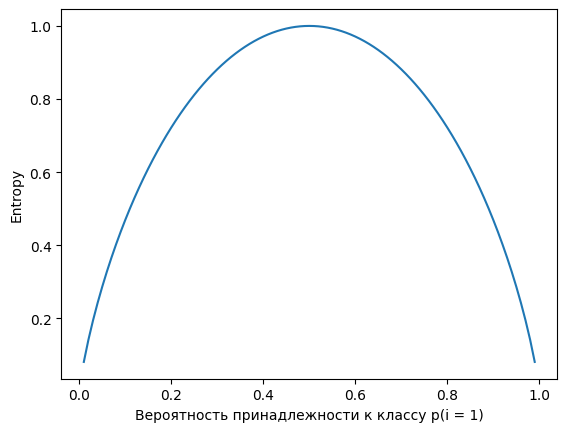

In [3]:
# First - Entropy
def entropy(p):
    return -p * np.log2(p) - (1 - p) * np.log2(1 - p)


x = np.arange(0.0, 1.0, 0.01)
entropy_y = entropy(x)

plt.xlabel("Вероятность принадлежности к классу p(i = 1)")
plt.ylabel("Entropy")
plt.plot(x, entropy_y)
plt.show()


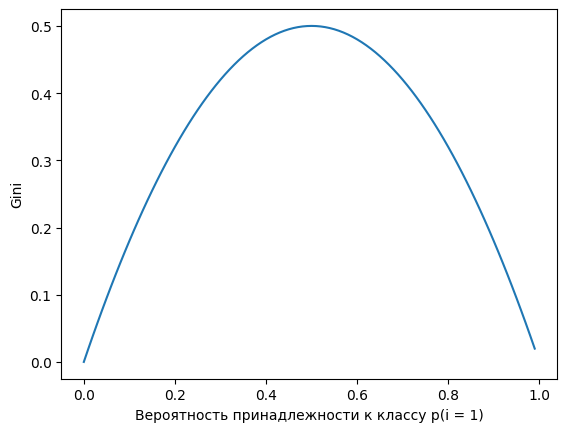

In [4]:
# Second - Gini Imputiry Function
def gini(p):
    return p * (1 - p) + (1 - p) * (1 - (1 - p))


gini_y = gini(x)
plt.xlabel("Вероятность принадлежности к классу p(i = 1)")
plt.ylabel("Gini")
plt.plot(x, gini_y)
plt.show()

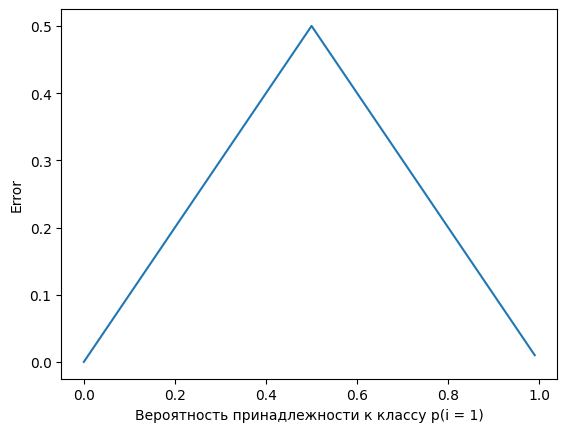

In [5]:
# Third - Classification error
def error(p):
    return 1 - np.max([p, 1 - p])


err_y = [error(pi) for pi in x]
plt.xlabel("Вероятность принадлежности к классу p(i = 1)")
plt.ylabel("Error")
plt.plot(x, err_y)
plt.show()

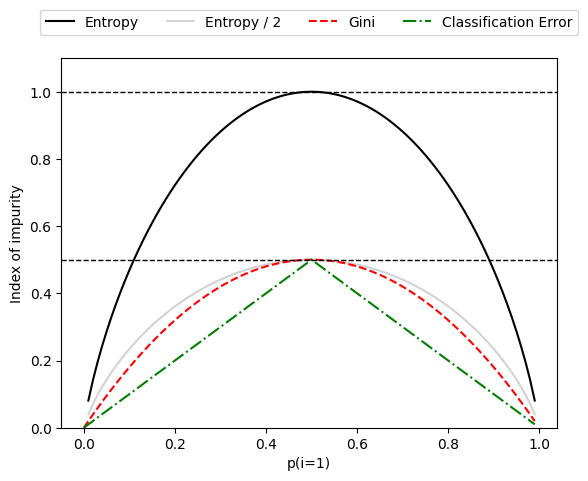

In [6]:
# Gini - function between entropy and classification error
sc_ent_y = entropy_y / 2

fig = plt.figure()
ax = plt.subplot(111)

for i, lab, ls, c in zip(
    [entropy_y, sc_ent_y, gini_y, err_y],
    ["Entropy", "Entropy / 2", "Gini", "Classification Error"],
    ["-", "-", "--", "-."],
    ["black", "lightgray", "red", "green", "cyan"],
):
    line = a = ax.plot(
        x,
        i,
        label=lab,
        linestyle=ls,
        color=c,
    )

ax.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, 1.15),
    ncol=5,
    fancybox=True,
    shadow=False,
)
ax.axhline(
    y=0.5,
    linewidth=1,
    color="k",
    linestyle="--",
)
ax.axhline(
    y=1.0,
    linewidth=1,
    color="k",
    linestyle="--",
)
plt.ylim([0.0, 1.1])
plt.xlabel("p(i=1)")
plt.ylabel("Index of impurity")
plt.show()

Training decision tree


In [7]:
X, y = load_iris(return_X_y=True)
X = X[:, [2, 3]]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    stratify=y,
    random_state=1,
    test_size=0.3,
)

X_combined = np.vstack([X_train, X_test])
y_combined = np.hstack([y_train, y_test])

In [9]:
d1_max_depth = 4

decision_tree1 = DecisionTreeClassifier(
    criterion="gini",
    max_depth=d1_max_depth,
    random_state=1,
)
decision_tree1.fit(X_train, y_train)
print(f"Done, max_depth={d1_max_depth}")

Done, max_depth=4


In [10]:
d2_max_depth = 3

decision_tree2 = DecisionTreeClassifier(
    criterion="gini",
    max_depth=d2_max_depth,
    random_state=1,
)
decision_tree2.fit(X_train, y_train)
print(f"Done, max_depth={d2_max_depth}")


Done, max_depth=3


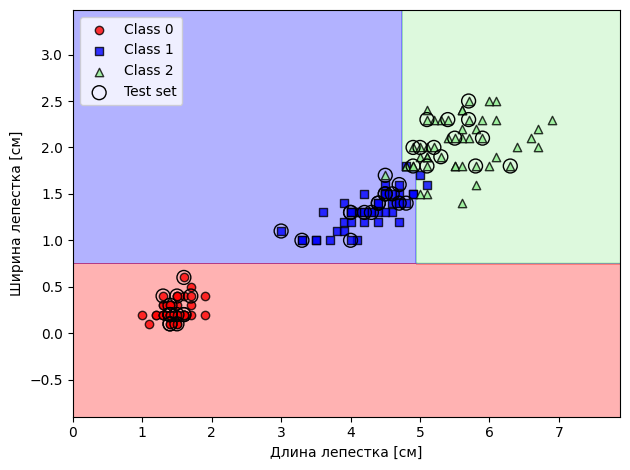

In [11]:
plot_decision_regions(
    X_combined,
    y_combined,
    decision_tree1,
    test_idx=range(105, 150),
)
plt.xlabel("Длина лепестка [см]")
plt.ylabel("Ширина лепестка [см]")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()


Show Trees


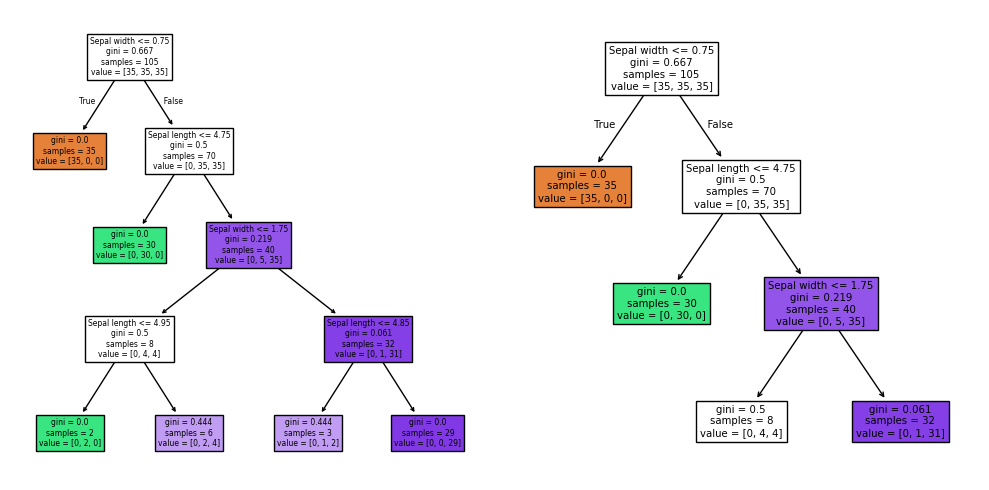

In [12]:
feature_names = [
    "Sepal length",
    "Sepal width",
    "Petal length",
    "Petal width",
]

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
tree.plot_tree(
    decision_tree1,
    feature_names=feature_names,
    filled=True,
    ax=axes[0],
)
tree.plot_tree(
    decision_tree2,
    feature_names=feature_names,
    filled=True,
    ax=axes[1],
)
plt.tight_layout()
plt.show()